Authors: Sydney Hemenway (s-hemenway@berkeley.edu), Calton Kong (caltonkong@berkeley.edu), Joel Ager (jwager@lbl.gov)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import eclabfiles as ecf
import os

In [5]:
"""
GOAL#1 : Plot individual ECSA (CV) scans
GOAL #2: Extract ECSA from multiple .mpg files from EC-Lab
DEPENDENCIES: eclabfiles library "python -m pip install eclabfiles"
"""

'\nGOAL: Extract ECSA from multiple .mpg files from EC-Lab\nDEPENDENCIES: eclabfiles library "python -m pip install eclabfiles"\n'

In [ ]:
#units
kg, sec, coul, meter, kelvin, mol = 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

g = kg * 10**-3
A = coul / sec
mA = A * 10 **-3
mC = coul * 10**-3
N = kg * meter * sec**-2
Pa = N / meter**2
Joule = N * meter
Volt = Joule / coul
mV = Volt * 10**-3
dm = meter * 10**-1
L = dm**3
M = mol * L**-1
mM = M * 10**-3

F = 96485.33212 * coul / mol
R = 8.31446261815324 * Joule * mol / kelvin
atm = 101325 * Pa

refs = {'SHE': 0, 'Ag/AgCl': 0.197, 'Hg/HgO': 0.098, 'SCE': 0.242, 'RHE': lambda pH: -0.0592 * pH, 'Ag/Ag+': 0.799}


In [14]:
#returns a dictionary where each entry is "Cycle #" each dictionary contains a 2D array where one row is the potentials and the other is the 
#corresponding current
#Adapting code from Calton to visualize a single CV scan 

names = ['time', 'control_V', 'Ewe', '<I>', 'cycle number', '(Q-Qo)', 'I Range',
       'mode', 'ox/red', 'error', 'control changes', 'counter inc.', 'uts'] #this should match df.columns for .mpr files
col_names_to_idcs = dict([(names[i], i) for i in range(len(names))])

#user facing function that takes in filename and path, breaks up cycles, and plots desired cycles
def display_CV(filename, path="", cycle_nums = 'all', ref_meas="Ag/Ag+"):
    filepath = filename
    if path:
        filepath = path+"\\"+filename
    df = ecf.to_df(filepath)
    df.head()
    IV = CV_IV_byCycle(df)
    filename_removed_extension = os.path.splitext(filename)[0]
    #make a folder for the curve to be saved
    try:  
        os.mkdir("Curves")  
    except OSError as error:  
        pass
        # print(error)   
    plot_CVs(IV, filename_removed_extension, cycle_nums = cycle_nums, colormap = 'Dark2', Ref_meas = ref_meas, Ref_disp = ref_meas)

#returns a dictionary where each entry is "Cycle #" each dictionary contains a 2D array where one row is the potentials and the other is the 
#corresponding current
def CV_IV_byCycle(data):
    cycle_number = 0.0
    IV = {}
    for rowidx, vals in data.iterrows():
        # print(rowidx, vals)
        if vals[col_names_to_idcs['cycle number']] != cycle_number:
            cycle_number = vals[col_names_to_idcs['cycle number']]
            IV['Cycle ' + str(int(cycle_number))] = np.array([[],[]])
        IV['Cycle ' + str(int(cycle_number))] = np.append(IV['Cycle ' + str(int(cycle_number))], np.array([[vals[col_names_to_idcs['Ewe']]*Volt], [vals[col_names_to_idcs['<I>']]*mA]]), axis = 1)
    return IV

#takes the CV data and plots them by cycle number, you can state which cycle numbers you want
#just put in an array or tuple of the numbers, e.g [1, 4, 7, 10]
def plot_CVs(IV, filename, cycle_nums = 'all', colormap = 'Dark2', Ref_meas = 'Hg/HgO', Ref_disp = 'Hg/HgO'):
    cmap = plt.colormaps[colormap]
    plt.figure(dpi = 600)
    plt.axvline(0, color = 'gray')
    plt.axhline(0, color = 'gray')
    if cycle_nums == 'all':
        cycle_nums = range(1, len(IV) + 1)
    for cycle, color in zip(cycle_nums, cmap(np.linspace(0, 1, len(IV)))):
        plt.plot(IV['Cycle ' + str(cycle)][0, :]/Volt, IV['Cycle ' + str(cycle)][1, :]/mA, label = 'Cycle ' + str(cycle), color = color )
    plt.legend()
    plt.ylabel('Current (mA)')
    plt.xlabel('E vs ' + Ref_disp + ' (V)')
    plt.title(filename)
    plt.savefig('Curves/' + filename, transparent = True, bbox_inches = 'tight')

In [15]:
import os
os.getcwd()
os.listdir()

['ecsa-ph6.PNG',
 'ecsa-ph8.PNG',
 'pH6-ODCu-CV.mps',
 'pH6-ODCu-CV_C01.mpr',
 'pH6-ODCu-CV_DUSB0_C01.sta',
 'pH6-ODCu-CV_region_100mVs.mps',
 'pH6-ODCu-CV_region_100mVs_C01.mpr',
 'pH6-ODCu-CV_region_100mVs_DUSB0_C01.sta',
 'pH6-ODCu-ECSA.mps',
 'pH6-ODCu-ECSA_01_CV_C01.mpr',
 'pH6-ODCu-ECSA_02_CV_C01.mpr',
 'pH6-ODCu-ECSA_03_CV_C01.mpr',
 'pH6-ODCu-ECSA_04_CV_C01.mpr',
 'pH6-ODCu-ECSA_05_CV_C01.mpr',
 'pH6-ODCu-ECSA_06_CV_C01.mpr',
 'pH6-ODCu-ECSA_07_CV_C01.mpr',
 'pH6-ODCu-ECSA_08_CV_C01.mpr',
 'pH6-ODCu-ECSA_09_CV_C01.mgr',
 'pH6-ODCu-ECSA_09_CV_C01.mpr',
 'pH6-ODCu-ECSA_DUSB0_C01.sta',
 'pH8-ODCu-CV_region_100mVs.mps',
 'pH8-ODCu-CV_region_100mVs_C01.mpr',
 'pH8-ODCu-CV_region_100mVs_DUSB0_C01.sta',
 'pH8-ODCu-ECSA.mps',
 'pH8-ODCu-ECSA_01_CV_C01.mgr',
 'pH8-ODCu-ECSA_01_CV_C01.mpr',
 'pH8-ODCu-ECSA_02_CV_C01.mgr',
 'pH8-ODCu-ECSA_02_CV_C01.mpr',
 'pH8-ODCu-ECSA_03_CV_C01.mgr',
 'pH8-ODCu-ECSA_03_CV_C01.mpr',
 'pH8-ODCu-ECSA_04_CV_C01.mgr',
 'pH8-ODCu-ECSA_04_CV_C01.mpr',
 'pH8-OD

In [16]:
filename = "pH6-ODCu-ECSA_01_CV_C01.mpr"
df = ecf.to_df(filename)
df.head()


,time,control_V,Ewe,<I>,cycle number,(Q-Qo),I Range,mode,ox/red,error,control changes,counter inc.,uts
0,0.0000,-0.128477,-0.126859,0.485593,1.0,0.000000e+00,40,2,1,0,0,0,1.697846e+09
1,0.0035,-0.129527,-0.128197,0.261172,1.0,9.695581e-07,40,2,1,0,1,0,1.697846e+09
2,0.0102,-0.131536,-0.131729,0.121420,1.0,2.222043e-06,40,2,1,0,1,0,1.697846e+09
3,0.0168,-0.133517,-0.133021,0.046154,1.0,2.769750e-06,40,2,1,0,1,0,1.697846e+09
4,0.0235,-0.135526,-0.135351,-0.144552,1.0,2.416962e-06,40,2,0,0,1,0,1.697846e+09


C:\Users\vpngu\AppData\Local\Temp\ipykernel_23312\2936923786.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if vals[col_names_to_idcs['cycle number']] != cycle_number:
C:\Users\vpngu\AppData\Local\Temp\ipykernel_23312\2936923786.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cycle_number = vals[col_names_to_idcs['cycle number']]
C:\Users\vpngu\AppData\Local\Temp\ipykernel_23312\2936923786.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

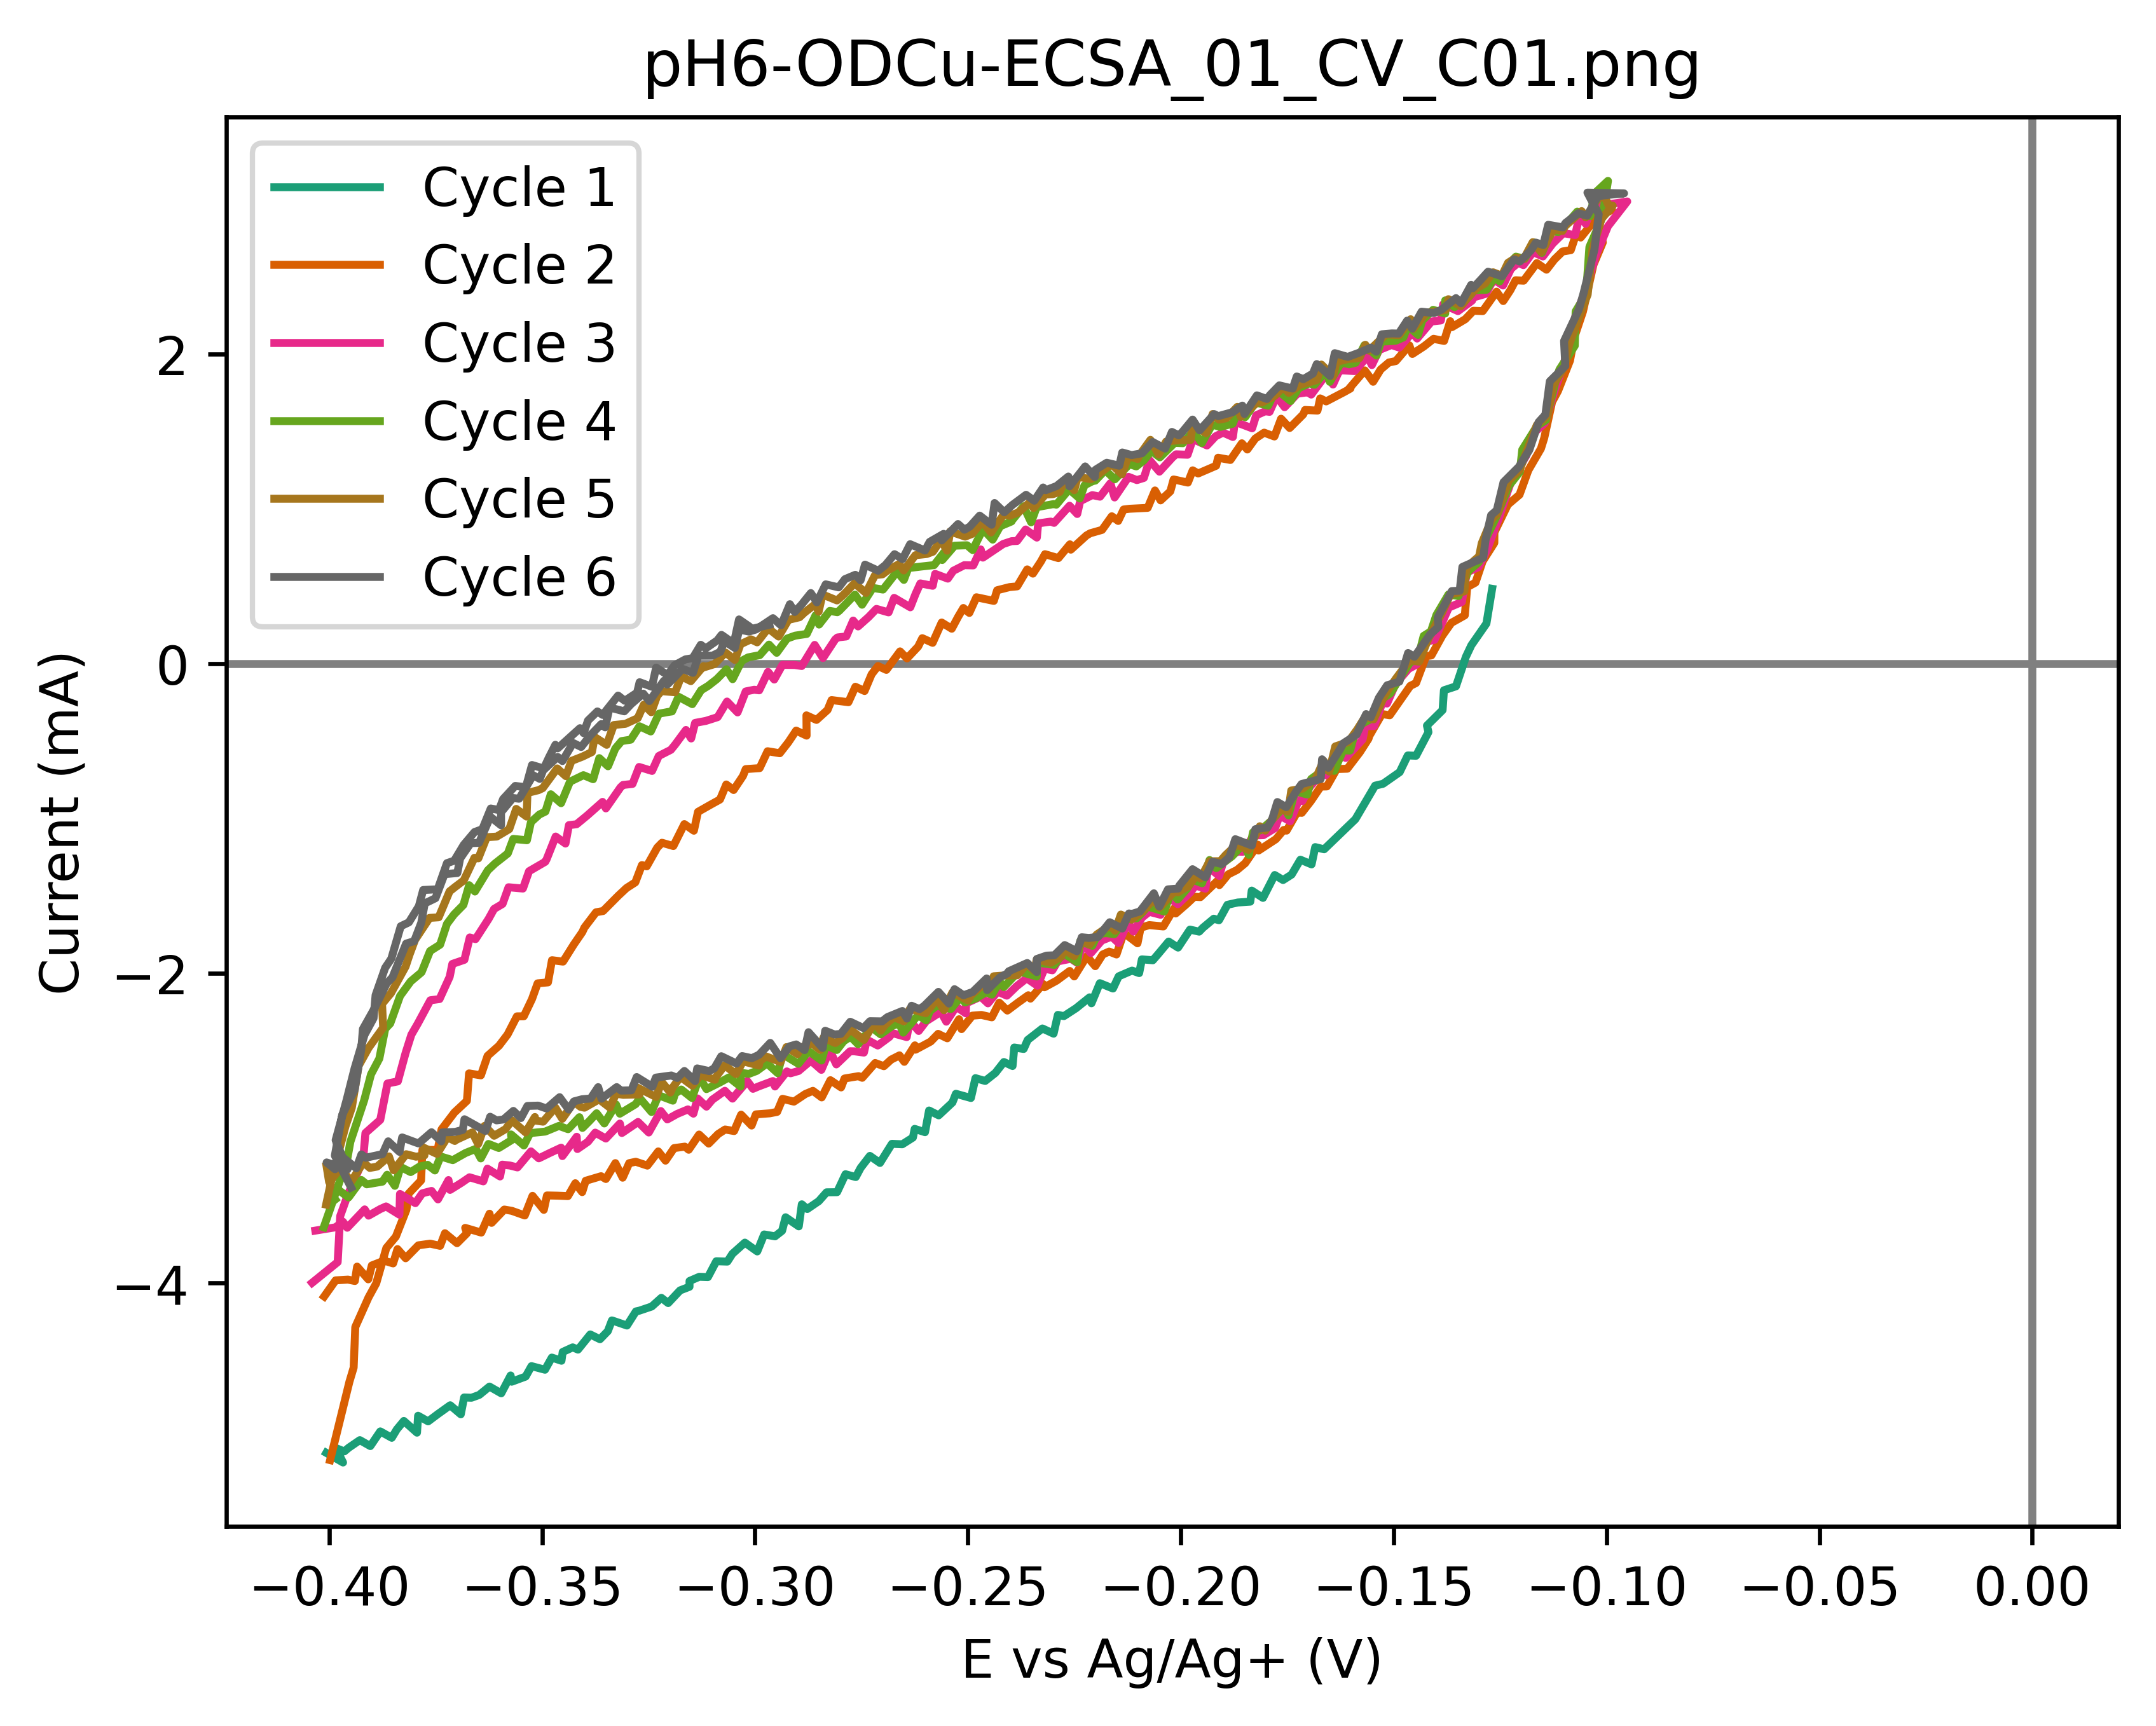

In [17]:
IV = CV_IV_byCycle(df)
filetosave =  "pH6-ODCu-ECSA_01_CV_C01.png"
plot_CVs(IV, filetosave, cycle_nums = 'all', colormap = 'Dark2', Ref_meas = 'Ag/Ag+', Ref_disp = 'Ag/Ag+')

In [18]:
#ECSA Specific functions

#TODO: fill in speeds and indices for your own ECSA scan
speeds = [300, 250,200,150,100,75,50,25,10]
idxrun_to_speed = dict([(i, speeds[i]) for i in range(len(speeds))])
print(idxrun_to_speed)

#TODO: fill in capacitance and surface area of your catalyst
flat_Cu_Cs = 0.089*10**(-3) #F
flat_Cu_density = 2.948*10**(-9) #mol/cm^2

def speed_from_name(filename):
    # pH8-ODCu-ECSA_06_CV_C01.mpr
    # print(filename[-12:-11])
    return idxrun_to_speed[int(filename[-12:-11])]

# cycle = 3
# ewe = IV['Cycle ' + str(cycle)][0, :]/Volt
# i = IV['Cycle ' + str(cycle)][1, :]/mA
# volt_concerned = -.2
# np.argmin([abs(point-volt_concerned) for point in ewe])

def split_cycle(ewe, i):
    size = len(ewe)
    res = int(size/2)
    return (ewe[:res], i[:res], ewe[res:], i[res:])
# inc_e, inc_i, dec_e, dec_i = split_cycle(ewe, i)

# index_charging_v = np.argmin([abs(point-volt_concerned) for point in inc_e])
# charging_i = inc_i[index_charging_v]
# index_discharging_v = np.argmin([abs(point-volt_concerned) for point in dec_e])
# discharging_i = dec_i[index_discharging_v]
# print(charging_i, discharging_i)
def ecsa(filenames, volt_concerned, cycle_nums=[2, 3, 4, 5], path=""):
    if cycle_nums == 'all':
        cycle_nums = range(1, len(IV) + 1)
    scan_speeds = []
    charging_is = []
    discharging_is = []
    for filename in filenames:
        filepath = filename
        if path:
            filepath = path+"\\"+filename
        df = ecf.to_df(filepath)
        df.head()
        IV = CV_IV_byCycle(df)
        file_ch_is  = []
        file_dch_is = []
        if cycle_nums == 'all':
            cycle_nums = range(1, len(IV) + 1)
        for cycle in cycle_nums:
            ewe =IV['Cycle ' + str(cycle)][0, :]/Volt
            i = IV['Cycle ' + str(cycle)][1, :]/mA
            charging_i, discharging_i = get_avg_charge_disch_i(ewe, i, filename, volt_concerned)
            file_ch_is.append(charging_i)
            file_dch_is.append(discharging_i)
        print(file_ch_is, file_dch_is)
        scan_speed = speed_from_name(filename)
        scan_speeds.append(scan_speed)
        charging_is.append(np.average(file_ch_is))
        discharging_is.append(np.average(file_dch_is))
    i_v_curve = pd.DataFrame({"Scan Rate (mV/s)": scan_speeds, "Charging Current (mA)": charging_is, "Discharging Current (mA)": discharging_is})
    fig, ax = plt.subplots()
    ax.set_title(filename)
    plot_cord_charge(i_v_curve, ax, volt_concerned, charging=True)
    plot_cord_charge(i_v_curve, ax, volt_concerned,  charging=False)

def get_avg_charge_disch_i(ewe, i , filename, volt_concerned):
    inc_e, inc_i, dec_e, dec_i = split_cycle(ewe, i)
    charging_i, discharging_i = np.inf, -np.inf
    if len(inc_e) !=0 and len(dec_e) !=0:
        index_charging_v = np.argmin([abs(point-volt_concerned) for point in inc_e])
        charging_i = inc_i[index_charging_v]
        index_discharging_v = np.argmin([abs(point-volt_concerned) for point in dec_e])
        discharging_i = dec_i[index_discharging_v]
    return (charging_i, discharging_i)
    


def plot_cord_charge(i_v_curve, ax, volt_concerned, charging=True):
    df = i_v_curve
    label = 'Discharging Current (mA)'
    if charging:
        label = "Charging Current (mA)"
    
    ax.scatter(df["Scan Rate (mV/s)"], df[label], label=f"{volt_concerned} V")
    ax.set_xlabel("Scan Rate (mV/s)")
    ax.set_ylabel("Current (mA)")

    x = df["Scan Rate (mV/s)"]
    y = df[label]
    a, b = np.polyfit(x, y, 1)
    #add line of best fit to plot
    ax.plot(x, a*x+b, color="gray", label = f"y={a:.2e}x+{b:.2e}")
    Cdl = a
    print(f"Cdl = {Cdl:.3e} F")

    roughness_factor = Cdl/flat_Cu_Cs
    print(f"Roughness factor = {roughness_factor:.3e}")

    ecsa = np.abs(roughness_factor * flat_Cu_density)
    min_rate = min(df["Scan Rate (mV/s)"])
    max_rate = max(df["Scan Rate (mV/s)"])
    print(f"Based on {volt_concerned}V and scan rates of {min_rate, max_rate}mV/s: ECSA = {ecsa:.3e} mol/cm^2")



{0: 300, 1: 250, 2: 200, 3: 150, 4: 100, 5: 75, 6: 50, 7: 25, 8: 10}


C:\Users\vpngu\AppData\Local\Temp\ipykernel_23312\2936923786.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if vals[col_names_to_idcs['cycle number']] != cycle_number:
C:\Users\vpngu\AppData\Local\Temp\ipykernel_23312\2936923786.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cycle_number = vals[col_names_to_idcs['cycle number']]
C:\Users\vpngu\AppData\Local\Temp\ipykernel_23312\2936923786.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

[1.1920421387654851, 1.3544577841361516, 1.4261613631170036, 1.4460430888894749] [-1.6120800370917934, -1.552393359022961, -1.5215489624897565, -1.475481029432554]
[1.346580400051998, 1.3023830051656446, 1.415575873376322, 1.3945462142705551] [-1.3472635638471235, -1.3168161458850456, -1.3344390490092213, -1.3203503224680055]
[1.1756861399750225, 1.2037152512633114, 1.213421447628594, 1.1677127119867166] [-1.220943553698202, -1.1565321695185622, -1.165755302300873, -1.2099753147049341]
[0.9665333966591589, 0.9567348795115151, 0.9493473890414981, 0.9768668304968823] [-1.058450673248558, -1.0428686138198107, -1.0742591564558093, -1.083831344708976]
[0.7206892537100185, 0.7163281835811706, 0.7137687097205552, 0.7227623024710326] [-0.8735759436446937, -0.885341312025524, -0.8766459433704945, -0.8798314730979815]
[0.5669517573836975, 0.5777171740902398, 0.5571880933139342, 0.5481077271535852] [-0.7720778897840823, -0.7597744038794154, -0.7695724882084427, -0.7500768125712582]
[0.40998267224

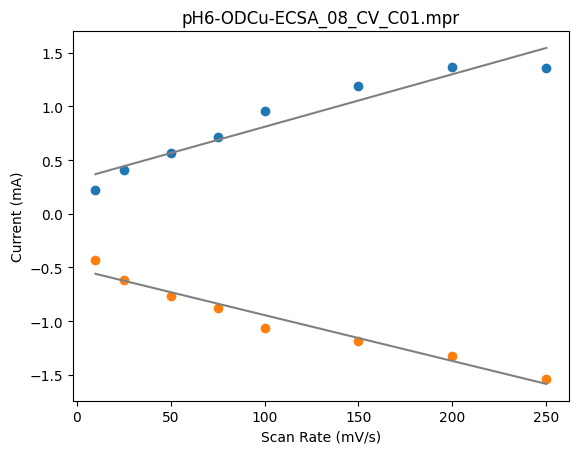

In [19]:
filenames = ['pH6-ODCu-ECSA_01_CV_C01.mpr',
 'pH6-ODCu-ECSA_02_CV_C01.mpr',
 'pH6-ODCu-ECSA_03_CV_C01.mpr',
 'pH6-ODCu-ECSA_04_CV_C01.mpr',
 'pH6-ODCu-ECSA_05_CV_C01.mpr',
 'pH6-ODCu-ECSA_06_CV_C01.mpr',
 'pH6-ODCu-ECSA_07_CV_C01.mpr',
 'pH6-ODCu-ECSA_08_CV_C01.mpr']
volt_concerned = -.2
ecsa(filenames, volt_concerned, cycle_nums=[2, 3, 4, 5], path="")

C:\Users\vpngu\AppData\Local\Temp\ipykernel_18148\3372078965.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if vals[col_names_to_idcs['cycle number']] != cycle_number:
C:\Users\vpngu\AppData\Local\Temp\ipykernel_18148\3372078965.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cycle_number = vals[col_names_to_idcs['cycle number']]
C:\Users\vpngu\AppData\Local\Temp\ipykernel_18148\3372078965.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

[1.7748932530803039, 1.8740762708588612, 1.9680702999654895, 2.0033249408006704] [-1.5695974560512642, -1.5240257949917486, -1.4580764632410128, -1.4561116391851137]
[1.8101747882993635, 1.8149571122577157, 1.7885884592848882, 1.819356555450029] [-1.4288623236046085, -1.4668465261224917, -1.392330277441551, -1.4384320400361155]
[1.5833632553967298, 1.566124456251007, 1.5468396097619816, 1.5136695397185562] [-1.305031673361853, -1.3188821293200128, -1.3212355462213337, -1.3278447453145965]
[1.3068465181729945, 1.2672578226922742, 1.2584147519831217, 1.2587855365940435] [-1.2296557115568199, -1.2539983318364634, -1.2566382874113777, -1.225981445786596]
[1.0269384283670542, 1.019351511237856, 0.9799740478690603, 1.0117092298490835] [-1.0410495021772608, -1.09405043833938, -1.0751758786898626, -1.102920141120098]
[0.8324054809032972, 0.8255111317103481, 0.8170736710335653, 0.8219457479432837] [-0.9737490984271173, -0.9708763765929973, -1.0067652382409857, -0.9427870160526055]
[0.6299361793

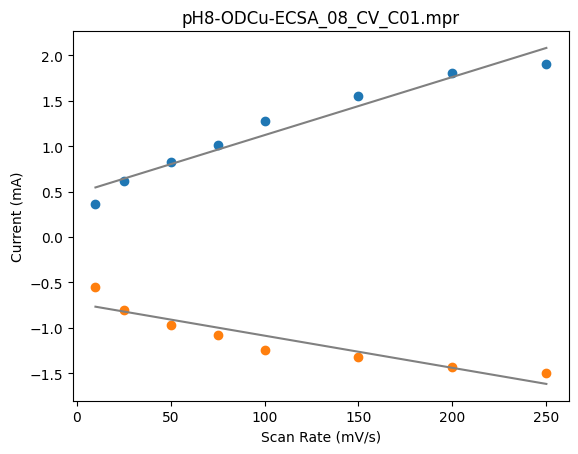

In [162]:
filenames = ['pH8-ODCu-ECSA_01_CV_C01.mpr',
 'pH8-ODCu-ECSA_02_CV_C01.mpr',
 'pH8-ODCu-ECSA_03_CV_C01.mpr',
 'pH8-ODCu-ECSA_04_CV_C01.mpr',
 'pH8-ODCu-ECSA_05_CV_C01.mpr',
 'pH8-ODCu-ECSA_06_CV_C01.mpr',
 'pH8-ODCu-ECSA_07_CV_C01.mpr',
 'pH8-ODCu-ECSA_08_CV_C01.mpr']
volt_concerned = -.2
ecsa(filenames, volt_concerned, cycle_nums=[2, 3, 4, 5], path="")